In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Load the dataset
#Waterjob dataset
df1 = pd.read_csv('C:/Users/nprit/Documents/Rising-Eagle-company-work/JobReportData/waterjobreport2017-winter2024.csv')
print(df1.head)

#Moldjob dataset
df2 = pd.read_csv('C:/Users/nprit/Documents/Rising-Eagle-company-work/JobReportData/Moldjob2017-winter2024.csv')
print(df2.head)

#Firejob dataset
df3 = pd.read_csv('C:/Users/nprit/Documents/Rising-Eagle-company-work/JobReportData/Firejob2017-Winter2024.csv')
print(df3.head)

In [7]:
# Define a function to map months to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Define a function to format season for a given dataset
def format_season(df):
    # Convert 'Call Date' to datetime format
    df['Call Date'] = pd.to_datetime(df['Call Date'])
    # Extract month from 'Call Date'
    df['Month'] = df['Call Date'].dt.month
    # Map months to seasons
    df['Season'] = df['Month'].apply(get_season)
    return df

# Load and format Waterjob dataset
df1 = format_season(df1)

# Load and format Moldjob dataset
df2 = format_season(df2)

# Load and format Firejob dataset

df3 = format_season(df3)

In [8]:
# Count total number of jobs for each season and each year
waterjob_counts = df1.groupby(['Season', df1['Call Date'].dt.year]).size().reset_index(name='Job Count')
moldjob_counts = df2.groupby(['Season', df2['Call Date'].dt.year]).size().reset_index(name='Job Count')
firejob_counts = df3.groupby(['Season', df3['Call Date'].dt.year]).size().reset_index(name='Job Count')

# Create DataFrame after counting jobs
waterjob_counts_df = pd.DataFrame(waterjob_counts)
moldjob_counts_df = pd.DataFrame(moldjob_counts)
firejob_counts_df = pd.DataFrame(firejob_counts)

# Pivot the waterjob counts DataFrame
waterjob_pivot = waterjob_counts_df.pivot(index='Season', columns='Call Date', values='Job Count')

# Pivot the moldjob counts DataFrame
moldjob_pivot = moldjob_counts_df.pivot(index='Season', columns='Call Date', values='Job Count')

# Pivot the firejob counts DataFrame
firejob_pivot = firejob_counts_df.pivot(index='Season', columns='Call Date', values='Job Count')

# Display the pivoted DataFrames
print("Waterjob Counts")
print(waterjob_pivot)
print("\nMoldjob Counts")
print(moldjob_pivot)
print("\nFirejob Counts ")
print(firejob_pivot)

Waterjob Counts
Call Date  2017  2018  2019   2020   2021   2022   2023  2024
Season                                                       
Fall        3.0  35.0  54.0   78.0   87.0   71.0   78.0   NaN
Spring      NaN  24.0  45.0   57.0   50.0   75.0   54.0   NaN
Summer      NaN  46.0  82.0  125.0  128.0  113.0  131.0   NaN
Winter      2.0  25.0  36.0   61.0   54.0   99.0   70.0  53.0

Moldjob Counts
Call Date  2017  2018  2019  2020  2021  2022  2023  2024
Season                                                   
Fall        NaN  27.0  20.0  31.0  34.0  13.0  23.0   NaN
Spring      NaN   8.0  17.0  16.0  18.0  19.0   9.0   NaN
Summer      NaN  30.0  24.0  13.0  37.0  23.0  16.0   NaN
Winter      2.0  10.0  22.0  21.0  16.0   9.0   9.0   9.0

Firejob Counts 
Call Date  2018  2019  2020  2021  2022  2023
Season                                       
Fall        1.0   NaN   2.0   1.0   3.0   1.0
Spring      NaN   2.0   5.0   1.0   1.0   NaN
Summer      NaN   NaN   1.0   NaN   5.0   1.0
W

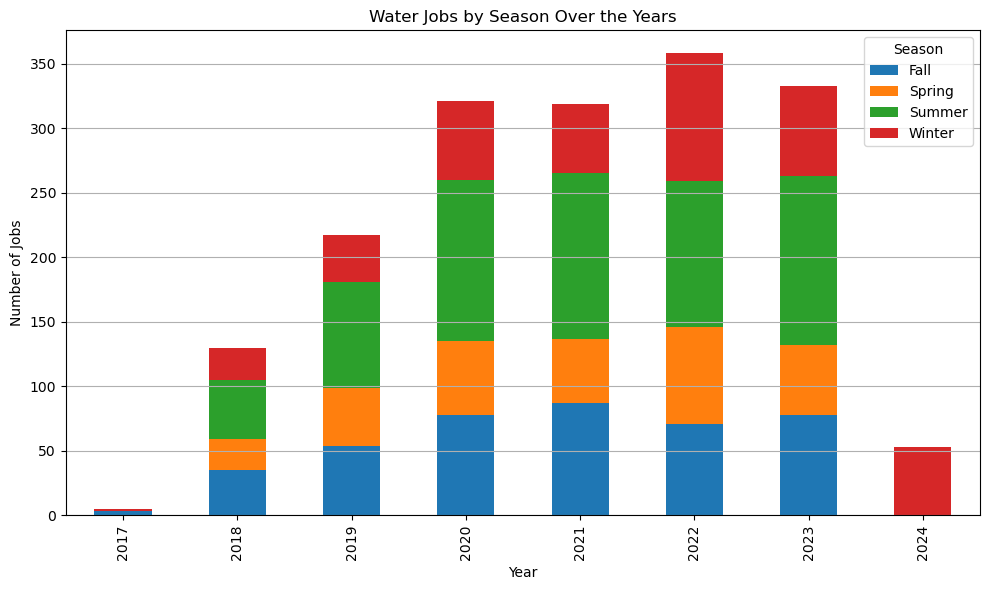

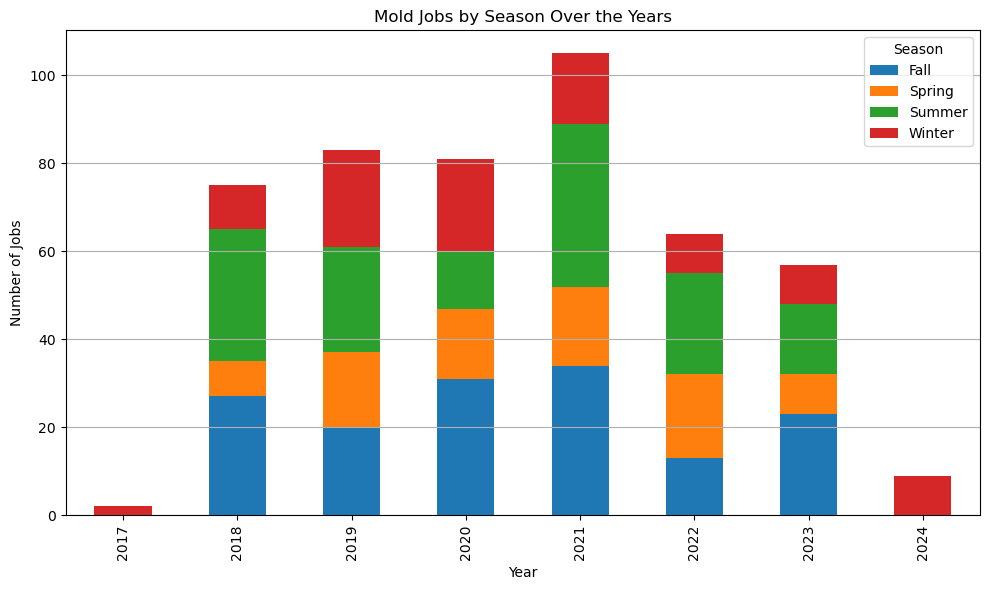

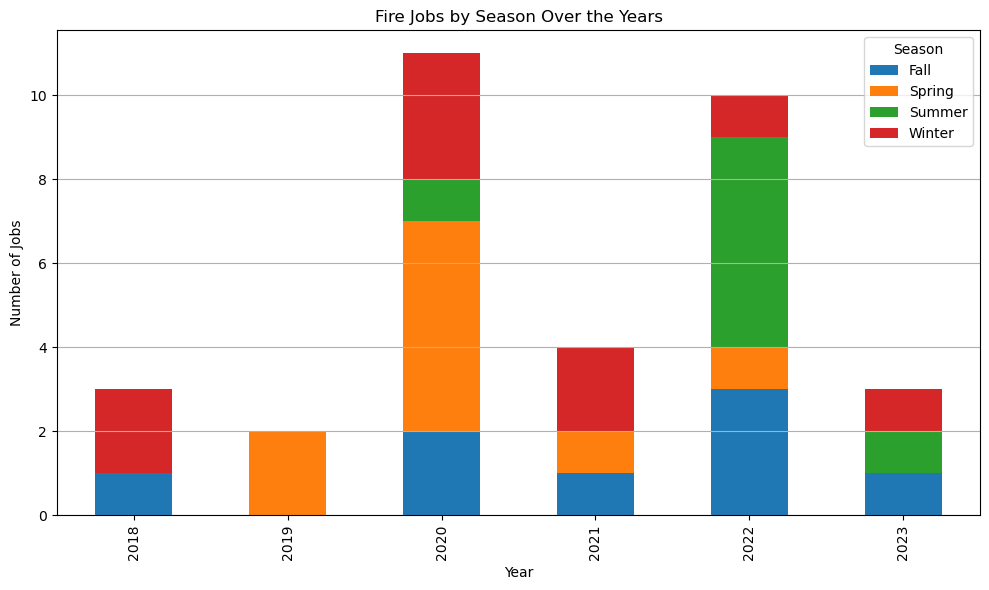

In [9]:
# Define a function to process and plot each dataset
def plot_seasonal_job_counts(df, title):
    # Convert 'Call Date' to datetime format
    df['Call Date'] = pd.to_datetime(df['Call Date'])

    # Extract year from 'Call Date'
    df['Year'] = df['Call Date'].dt.year

    # Count total number of jobs for each season and each year
    seasonal_job_counts = df.groupby(['Year', 'Season']).size().unstack(fill_value=0)

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))

    # Bar plot for each season
    seasonal_job_counts.plot(kind='bar', ax=ax, stacked=True)

    # Adding labels and title
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Jobs')
    ax.set_title(title)

    # Displaying the plot
    plt.grid(axis='y')
    plt.legend(title='Season')
    plt.tight_layout()
    plt.show()

# Plotting for water jobs
plot_seasonal_job_counts(df1, 'Water Jobs by Season Over the Years')

# Plotting for mold jobs
plot_seasonal_job_counts(df2, 'Mold Jobs by Season Over the Years')

# Plotting for fire jobs
plot_seasonal_job_counts(df3, 'Fire Jobs by Season Over the Years')


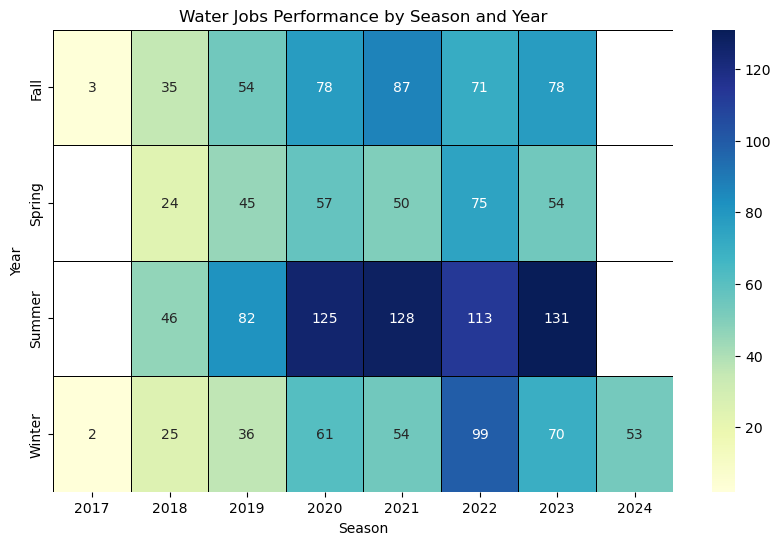

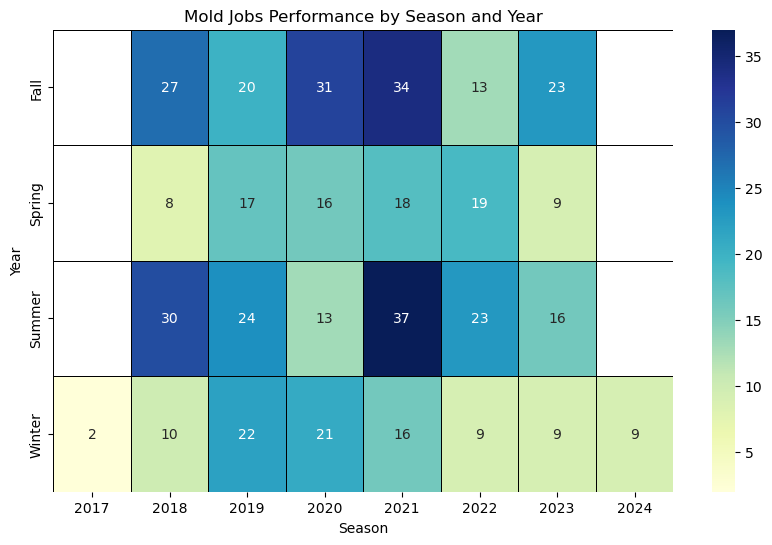

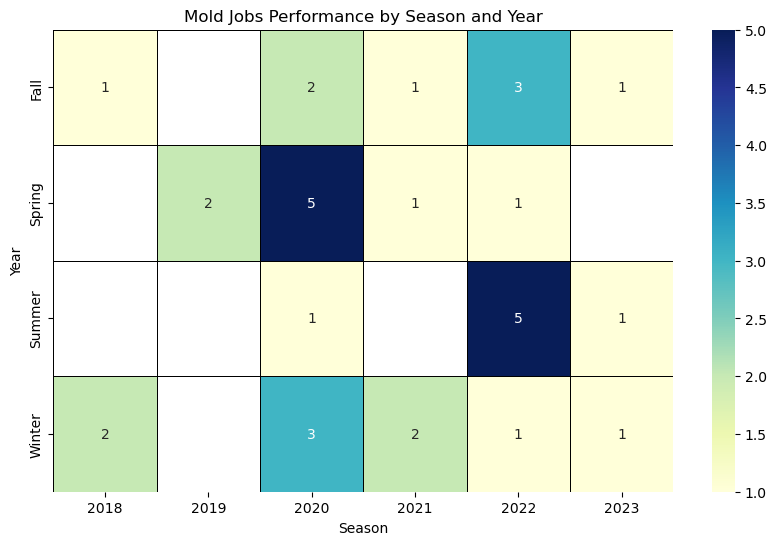

In [10]:
# Plot waterjob counts
plt.figure(figsize=(10, 6))
plt.title("Water Jobs Performance by Season and Year")
sns.heatmap(waterjob_pivot, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=0.5, linecolor='black')
plt.xlabel("Season")
plt.ylabel("Year")
plt.show()

# Plot moldjob counts
plt.figure(figsize=(10, 6))
plt.title("Mold Jobs Performance by Season and Year")
sns.heatmap(moldjob_pivot, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=0.5, linecolor='black')
plt.xlabel("Season")
plt.ylabel("Year")
plt.show()

# Plot firejob counts
plt.figure(figsize=(10, 6))
plt.title("Mold Jobs Performance by Season and Year")
sns.heatmap(firejob_pivot, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=0.5, linecolor='black')
plt.xlabel("Season")
plt.ylabel("Year")
plt.show()

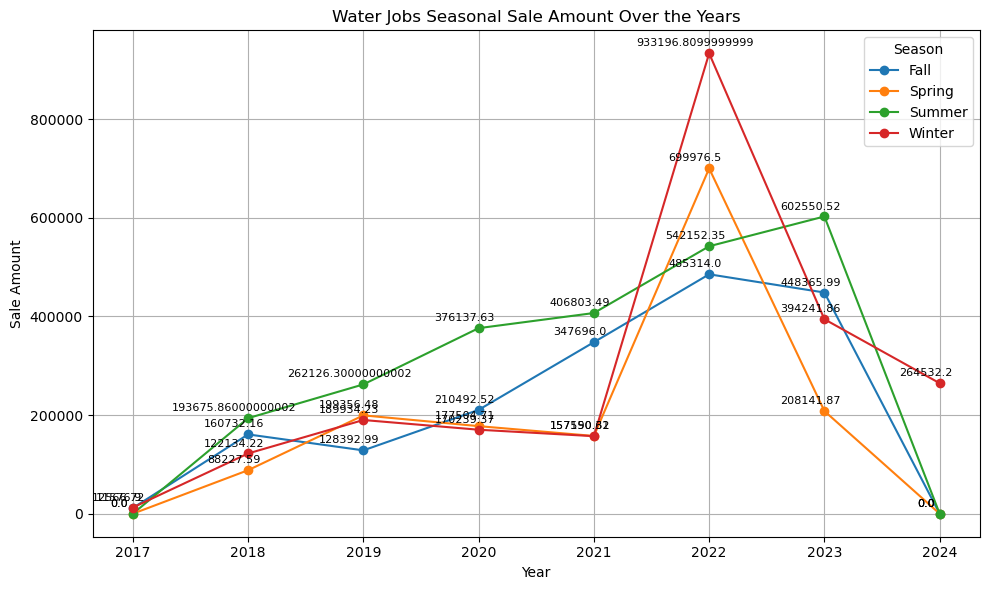

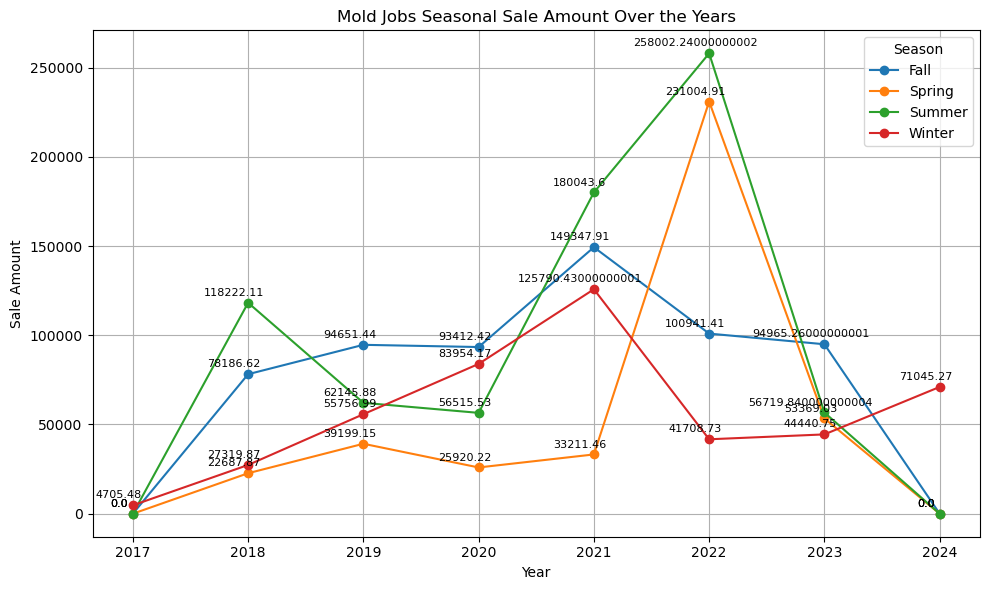

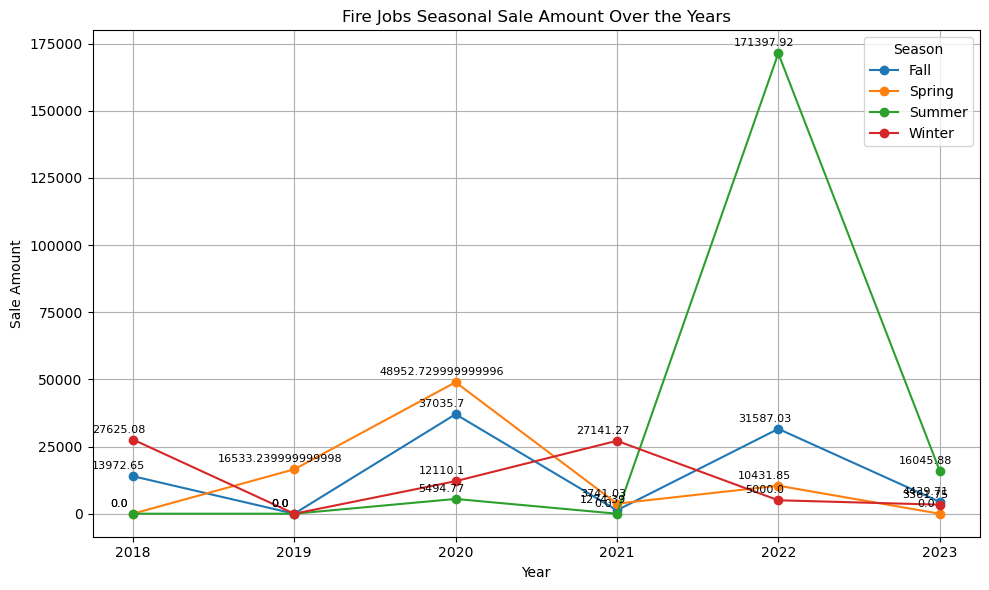

In [11]:
# Define a function to plot seasonal sale amounts with annotations
def plot_seasonal_sale_amount(df, title):
    # Extract year and season from 'Call Date'
    df['Year'] = df['Call Date'].dt.year
    df['Season'] = df['Month'].apply(get_season)
    
    # Group by year and season, and sum the sale amounts
    seasonal_sale_amount = df.groupby(['Year', 'Season'])['Sale Amount'].sum().unstack(fill_value=0)
    
    # Plotting
    ax = seasonal_sale_amount.plot(kind='line', marker='o', figsize=(10, 6))
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Sale Amount')
    plt.grid(True)
    plt.legend(title='Season')
    plt.tight_layout()
    
    # Adding annotations
    for year in seasonal_sale_amount.index:
        for season in seasonal_sale_amount.columns:
            value = seasonal_sale_amount.loc[year, season]
            ax.annotate(f'{value}', xy=(year, value), xytext=(-10, 5), textcoords='offset points', ha='center', fontsize=8)
    
    plt.show()

# Plot seasonal sale amounts with annotations for water jobs
plot_seasonal_sale_amount(df1, 'Water Jobs Seasonal Sale Amount Over the Years')

# Plot seasonal sale amounts with annotations for mold jobs
plot_seasonal_sale_amount(df2, 'Mold Jobs Seasonal Sale Amount Over the Years')

# Plot seasonal sale amounts with annotations for fire jobs
plot_seasonal_sale_amount(df3, 'Fire Jobs Seasonal Sale Amount Over the Years')



In [12]:
# Prepare data for forecasting
winter_data_water = waterjob_pivot.loc['Winter'].values
summer_data_water = waterjob_pivot.loc['Summer'].values

winter_data_mold = moldjob_pivot.loc['Winter'].values
summer_data_mold = moldjob_pivot.loc['Summer'].values

winter_data_fire = firejob_pivot.loc['Winter'].values
summer_data_fire = firejob_pivot.loc['Summer'].values


In [13]:
# Extract sale amount data for each type of job and each season
winter_data_water_sales = df1[df1['Season'] == 'Winter']['Sale Amount'].values
summer_data_water_sales = df1[df1['Season'] == 'Summer']['Sale Amount'].values

winter_data_mold_sales = df2[df2['Season'] == 'Winter']['Sale Amount'].values
summer_data_mold_sales = df2[df2['Season'] == 'Summer']['Sale Amount'].values

winter_data_fire_sales = df3[df3['Season'] == 'Winter']['Sale Amount'].values
summer_data_fire_sales = df3[df3['Season'] == 'Summer']['Sale Amount'].values



In [14]:
# Fit ARIMA model for Water jobs
winter_model_water = ARIMA(winter_data_water, order=(1, 1, 1), enforce_stationarity=False, enforce_invertibility=False).fit()
winter_forecast_water = winter_model_water.forecast(steps=len(winter_data_water))  # Forecast for the same length as the original data

summer_model_water = ARIMA(summer_data_water, order=(1, 1, 1), enforce_stationarity=False, enforce_invertibility=False).fit()
summer_forecast_water = summer_model_water.forecast(steps=len(summer_data_water))

# Fit ARIMA model for Mold jobs
winter_model_mold = ARIMA(winter_data_mold, order=(1, 1, 1), enforce_stationarity=False, enforce_invertibility=False).fit()
winter_forecast_mold = winter_model_mold.forecast(steps=len(winter_data_mold))

summer_model_mold = ARIMA(summer_data_mold, order=(1, 1, 1), enforce_stationarity=False, enforce_invertibility=False).fit()
summer_forecast_mold = summer_model_mold.forecast(steps=len(summer_data_mold))

# Fit ARIMA model for Fire jobs
winter_model_fire = ARIMA(winter_data_fire, order=(1, 1, 1), enforce_stationarity=False, enforce_invertibility=False).fit()
winter_forecast_fire = winter_model_fire.forecast(steps=len(winter_data_fire))

summer_model_fire = ARIMA(summer_data_fire, order=(1, 1, 1), enforce_stationarity=False, enforce_invertibility=False).fit()
summer_forecast_fire = summer_model_fire.forecast(steps=len(summer_data_fire))



C:\Users\nprit\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\nprit\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\nprit\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\nprit\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [15]:
# Fit ARIMA model for Water jobs' sale amount
winter_model_water_sale = ARIMA(winter_data_water_sales, order=(1, 1, 1), enforce_stationarity=False, enforce_invertibility=False).fit()
winter_forecast_water_sales = winter_model_water_sale.forecast(steps=len(winter_data_water_sales))  

summer_model_water_sale = ARIMA(summer_data_water_sales, order=(1, 1, 1), enforce_stationarity=False, enforce_invertibility=False).fit()
summer_forecast_water_sales = summer_model_water_sale.forecast(steps=len(summer_data_water_sales))

# Fit ARIMA model for Mold jobs' sale amount
winter_model_mold_sale = ARIMA(winter_data_mold_sales, order=(1, 1, 1), enforce_stationarity=False, enforce_invertibility=False).fit()
winter_forecast_mold_sales = winter_model_mold_sale.forecast(steps=len(winter_data_mold_sales))

summer_model_mold_sale = ARIMA(summer_data_mold_sales, order=(1, 1, 1), enforce_stationarity=False, enforce_invertibility=False).fit()
summer_forecast_mold_sales = summer_model_mold_sale.forecast(steps=len(summer_data_mold_sales))

# Fit ARIMA model for Fire jobs' sale amount
winter_model_fire_sale = ARIMA(winter_data_fire_sales, order=(1, 1, 1), enforce_stationarity=False, enforce_invertibility=False).fit()
winter_forecast_fire_sales = winter_model_fire_sale.forecast(steps=len(winter_data_fire_sales))

summer_model_fire_sale = ARIMA(summer_data_fire_sales, order=(1, 1, 1), enforce_stationarity=False, enforce_invertibility=False).fit()
summer_forecast_fire_sales = summer_model_fire_sale.forecast(steps=len(summer_data_fire_sales))


Forecasted Number of Jobs:
             Water Jobs  Mold Jobs  Fire Jobs
Season                                       
Winter 2024   58.375512   8.999706   1.307396
Summer 2024  129.323380  22.036404   2.364544


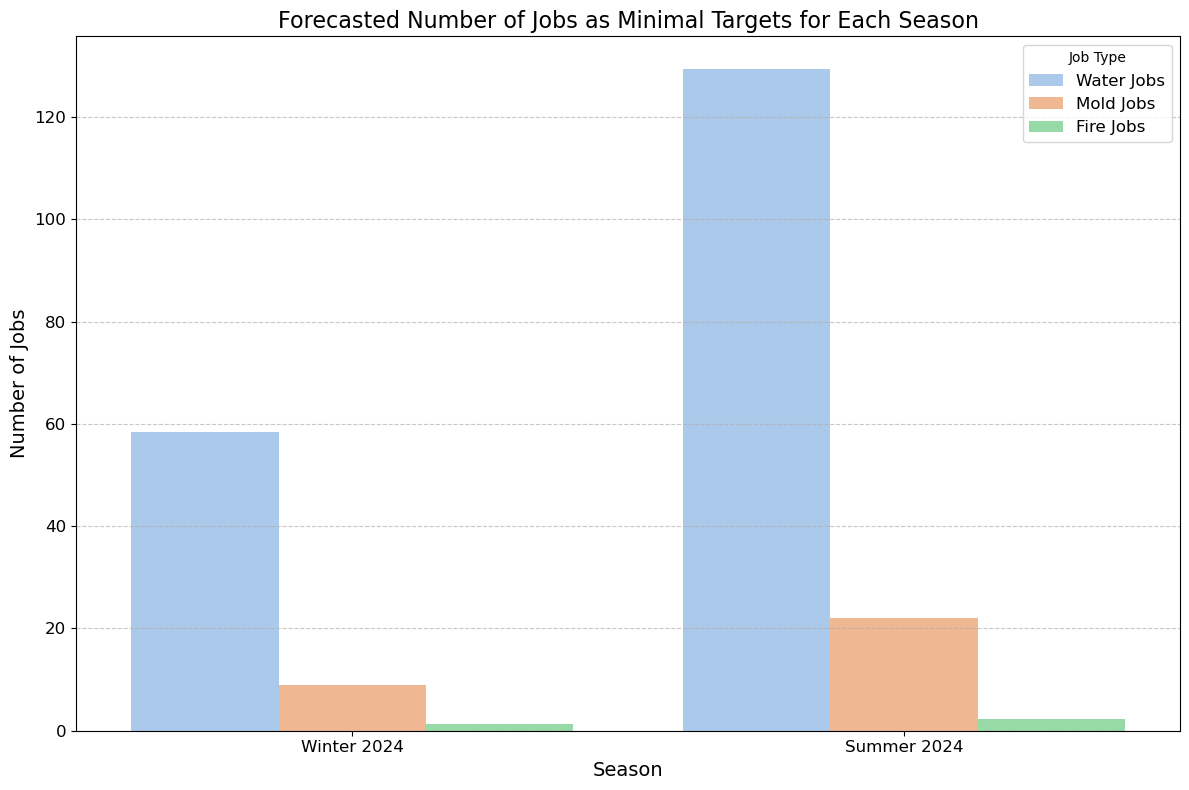

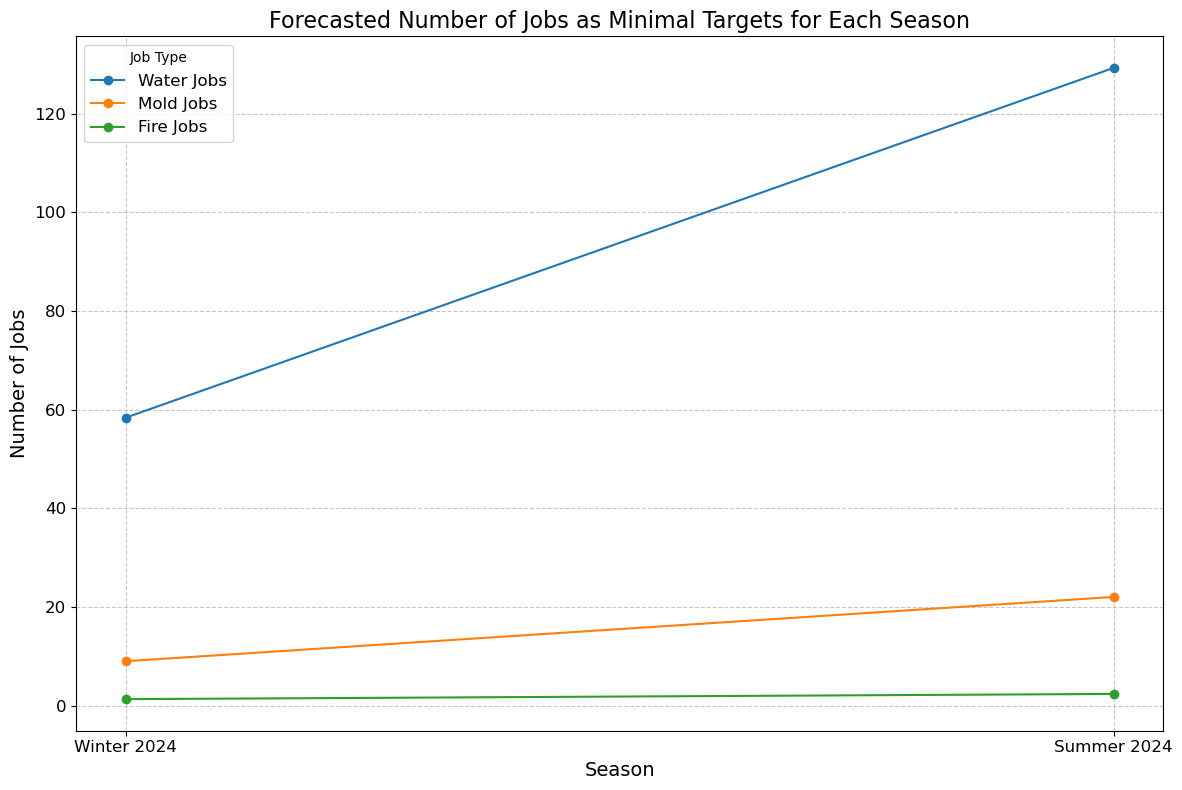

In [16]:
# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame({
    'Season': ['Winter 2024', 'Summer 2024'],
    'Water Jobs': [winter_forecast_water[0], summer_forecast_water[0]],
    'Mold Jobs': [winter_forecast_mold[0], summer_forecast_mold[0]],
    'Fire Jobs': [winter_forecast_fire[0], summer_forecast_fire[0]]
})

# Set the color palette
colors = sns.color_palette("pastel")

# Display the forecasted values table
print("Forecasted Number of Jobs:")
print(forecast_df.set_index('Season'))

# Visualization: Create a bar plot to show forecasted values as minimal targets for each season
plt.figure(figsize=(12, 8))
sns.barplot(data=forecast_df.melt(id_vars='Season', var_name='Job Type', value_name='Forecasted Jobs'), x='Season', y='Forecasted Jobs', hue='Job Type', palette=colors)
plt.title('Forecasted Number of Jobs as Minimal Targets for Each Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Number of Jobs', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Job Type', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualization: Create a line chart to show forecasted values as minimal targets for each season
plt.figure(figsize=(12, 8))
for column in forecast_df.columns[1:]:
    plt.plot(forecast_df['Season'], forecast_df[column], marker='o', label=column, linestyle='-')
plt.title('Forecasted Number of Jobs as Minimal Targets for Each Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Number of Jobs', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Job Type', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Forecasted Sale Amounts:
              Water Jobs    Mold Jobs     Fire Jobs
Season                                             
Winter 2024  4676.943402  3336.021395  26317.852363
Summer 2024  3744.807112  4979.301625  13122.041621


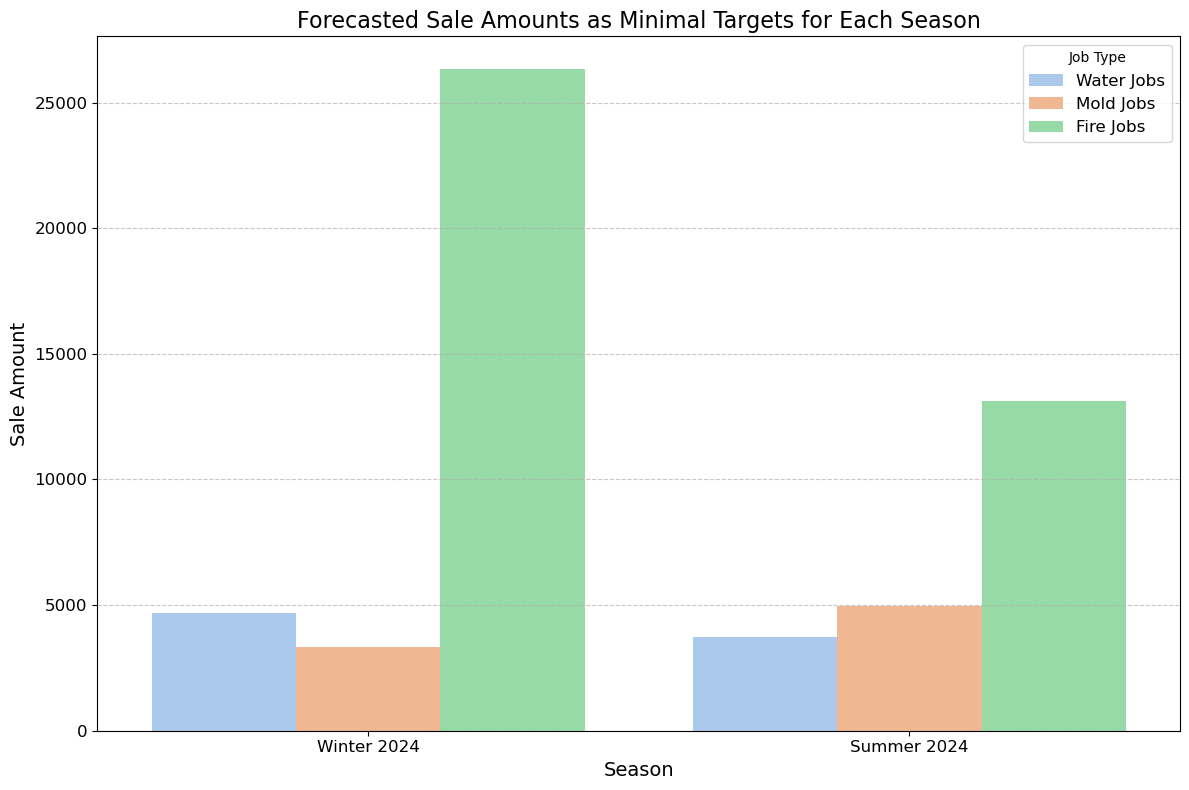

In [17]:
# Create a DataFrame for the forecasted sale amounts
forecast_sales_df = pd.DataFrame({
    'Season': ['Winter 2024', 'Summer 2024'],
    'Water Jobs': [winter_forecast_water_sales[0], summer_forecast_water_sales[0]],
    'Mold Jobs': [winter_forecast_mold_sales[0], summer_forecast_mold_sales[0]],
    'Fire Jobs': [winter_forecast_fire_sales[0], summer_forecast_fire_sales[0]]
})

# Set the color palette
colors = sns.color_palette("pastel")

# Display the forecasted sale amounts table
print("Forecasted Sale Amounts:")
print(forecast_sales_df.set_index('Season'))

# Visualization: Create a bar plot to show forecasted sale amounts as minimal targets for each season
plt.figure(figsize=(12, 8))
sns.barplot(data=forecast_sales_df.melt(id_vars='Season', var_name='Job Type', value_name='Forecasted Sales'), x='Season', y='Forecasted Sales', hue='Job Type', palette=colors)
plt.title('Forecasted Sale Amounts as Minimal Targets for Each Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Sale Amount', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Job Type', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

